In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure


#### Function 1: Harris Corner Detector is the algorithm used for the feature detector. You are required to implement a Harris corner detector to perform feature detection

In [6]:

# Load the image and convert it to grayscale
img = cv2.imread('img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute image derivatives using the Sobel operator
dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Compute products of derivatives
Ixx = dx**2
Ixy = dy*dx
Iyy = dy**2

# Apply Gaussian filter to products of derivatives
k = 0.04  # Harris detector parameter
window_size = 5  # Size of the window used to compute the Harris response
sigma = 1.5  # Standard deviation of the Gaussian filter
gaussian = cv2.GaussianBlur(Ixx, (window_size, window_size), sigma)
R = np.zeros_like(gray, dtype=np.float32)

# Compute Harris response for each pixel
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        M = np.array([[gaussian[i,j], Ixy[i,j]], [Ixy[i,j], gaussian[i,j]]])
        R[i,j] = np.linalg.det(M) - k*(np.trace(M)**2)

# Apply threshold to the Harris response to select corner pixels
threshold = 0.01 * np.max(R)
corners = np.zeros_like(R, dtype=np.uint8)
corners[R > threshold] = 255

# Perform non-maximum suppression
corners = cv2.dilate(corners, None)
img[corners == 255] = [0, 0, 255]  # Draw the detected corners on the original image

cv2.imshow('Harris Corner Detector', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Function 2: HOG is a histogram of orientations of the image gradients within a patch. The Histogram of Oriented Gradients method (or HOG for short) is used for object detection and image recognition. HOG is based on feature descriptors, which extract useful information and discard the unnecessary parts. HOG calculates the horizontal and vertical components of the gradient’s magnitude and direction of each individual pixel and then organizes the information into a 9-bin histogram to determine shifts in the data. You are required to implement HOG in python to perform the feature description.

C:\Users\Anh Vu\AppData\Local\Temp\ipykernel_28772\3488396727.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


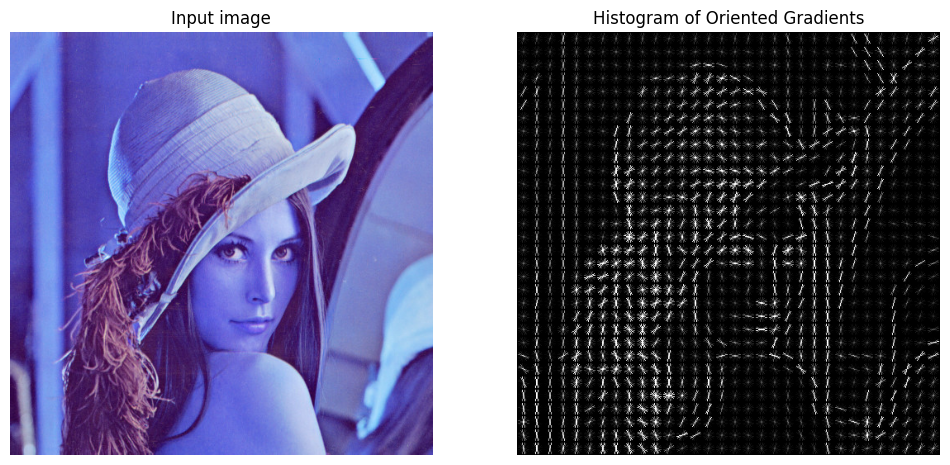

In [7]:
image = cv2.imread('img.jpg')

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

#### Function 3: Edges are significant local changes of intensity in a digital image. An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions. You are required to implement the Canny Operator in python to perform edge detection.

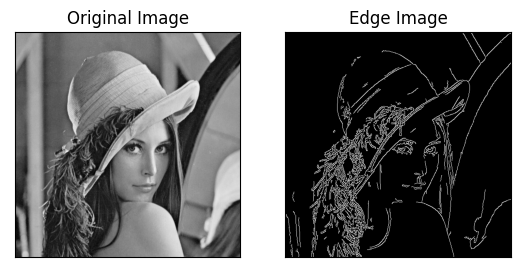

In [9]:
img = cv2.imread('img.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### Function 4: Hough transform is used to recognize complex lines in photographs. For the Hough Transform algorithm, it is crucial to perform edge detection first to produce an edge image which will then be used as input into the algorithm. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. You are required to implement Hough transform in python to perform line detection( Rectangle detection)

In [3]:
img = cv2.imread('Img.jpg')

# convert the input image to grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find the edges using Canny edge detector
edges = cv2.Canny(gray,50,200,apertureSize = 3)
minLineLength = 10
maxLineGap = 5

# apply probabilistic Hough transform
cv2.imshow('orignal', img)
cv2.imshow('edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()